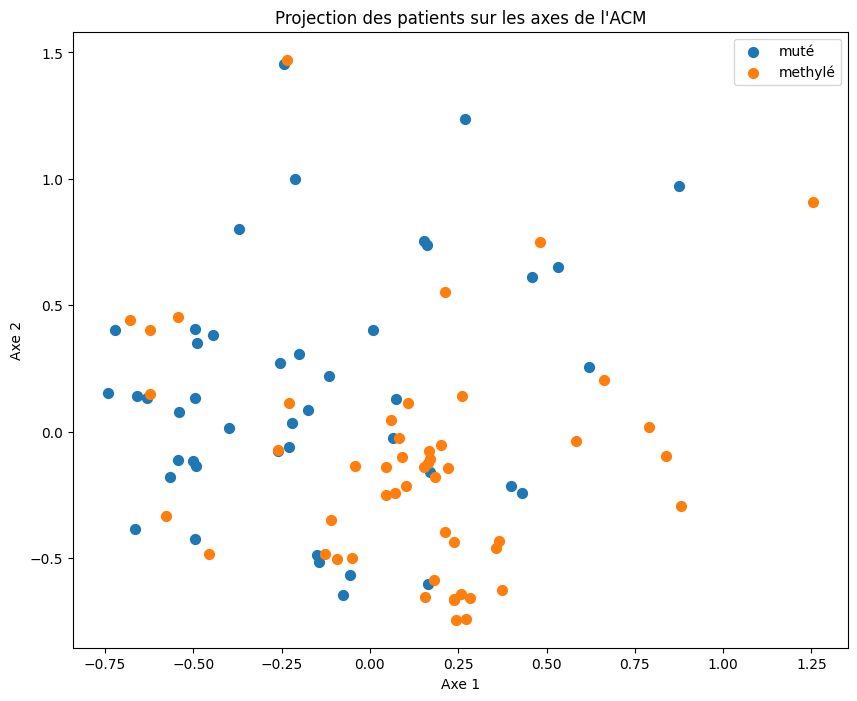

Différence moyenne par axe : 0    0.308331
1    0.065767
2    0.281096
3    0.045755
4    0.173855
5    0.115861
6    0.033764
7    0.069351
8    0.006862
9    0.026298
dtype: float64


,Antécédants familiaux_amsterdam II,Antécédants familiaux_pas d'histoire,IHC MMR_M1/P2,IHC MMR_P2,Unnamed: 9,type_tumeur_simplifie_colon_seul,type_tumeur_simplifie_endo_seul,type_tumeur_simplifie_multiples,age_<45,age_45-50,age_>50
0,0,0,1,0,NaN,0,0,1,1,0,0
1,1,0,1,0,NaN,1,0,0,1,0,0
2,0,0,0,0,NaN,1,0,0,1,0,0
3,1,0,1,0,NaN,1,0,0,0,0,1
4,1,0,1,0,NaN,0,0,1,0,1,0
5,0,0,1,0,NaN,0,1,0,0,1,0
6,0,0,0,1,NaN,0,0,0,1,0,0
7,0,0,1,0,NaN,0,0,1,1,0,0
8,0,0,1,0,NaN,1,0,0,1,0,0
9,1,0,0,0,NaN,1,0,0,0,0,1


In [41]:
#ACM a faire en recodant les types de cancers exclusif comme la regression 

# 1️⃣ Import des librairies
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 2️⃣ Charger les données
data = pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil(version2).xlsx')


# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats

# ============================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================================
data = pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\acm_these.xlsx')


# Créer une variable simplifiée avec une seule modalité pour les multiples
data['type_tumeur_simplifie'] = 'autre_tumeur'

# Dès qu'un cancer multiple est détecté → catégorie "multiples"
data.loc[data['cancer multiples'] == 1, 'type_tumeur_simplifie'] = 'multiples'

# Pour les tumeurs uniques, on précise le type
data.loc[(data['cancer multiples'] == 0) & (data['tumeur colorectal'] == 1), 'type_tumeur_simplifie'] = 'colon_seul'
data.loc[(data['cancer multiples'] == 0) & (data['tumeur endometrial'] == 1), 'type_tumeur_simplifie'] = 'endo_seul'


# Supprimer les colonnes inutiles
data = data.drop(columns=['tumeur endometrial', 'tumeur colorectal', 'cancer multiples'])

# Encodage one-hot
data = pd.get_dummies(data, columns=['type_tumeur_simplifie'], drop_first=True)




# 4️⃣ Discrétiser l'âge et créer des dummies
bins = [0, 45, 50, 150]  
labels = ["<45", "45-50", ">50"]
data['age_cat'] = pd.cut(data["Age de la premiere tumeur"], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['age_cat'], prefix='age')
data = data.drop(columns=['Age de la premiere tumeur'])
data_fin=data.drop(columns=['muté/methylé'])



bool_cols = data_fin.select_dtypes('bool').columns
data_fin[bool_cols] = data_fin[bool_cols].astype(int)



# 7️⃣ Créer l'ACM
acm = prince.MCA(
    n_components=10,   # nombre d'axes factoriels
    n_iter=5,
    copy=True,
    random_state=42
)

acm = acm.fit(data_fin)

# 8️⃣ Coordonnées des individus
ind_coords = acm.row_coordinates(data_fin)

# 9️⃣ Couleurs selon la variable muté/methylé
colors = data.loc[data.index, "muté/methylé"]

# 🔟 Visualisation
plt.figure(figsize=(10,8))

# Ajouter un micro-décalage aléatoire
np.random.seed(42)
jitter_x = np.random.normal(0, 0.07, size=len(ind_coords))
jitter_y = np.random.normal(0, 0.07, size=len(ind_coords))
# Définir un dictionnaire de correspondance
noms_statuts = {1: 'methylé', 0: 'muté'}  # ← Attention à l'ordre!

for val in colors.unique():
    mask = colors == val
    plt.scatter(ind_coords.loc[mask, 2] + jitter_x[mask], 
                ind_coords.loc[mask, 0] + jitter_y[mask],
                label=noms_statuts[val], alpha=1, s=50)

plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Projection des patients sur les axes de l'ACM")
plt.legend()
plt.show()
data_fin.head(10)



group_means = ind_coords.groupby(colors).mean()
diff_means = np.abs(group_means.iloc[0] - group_means.iloc[1])
print("Différence moyenne par axe :", diff_means)

data_fin.head(10)



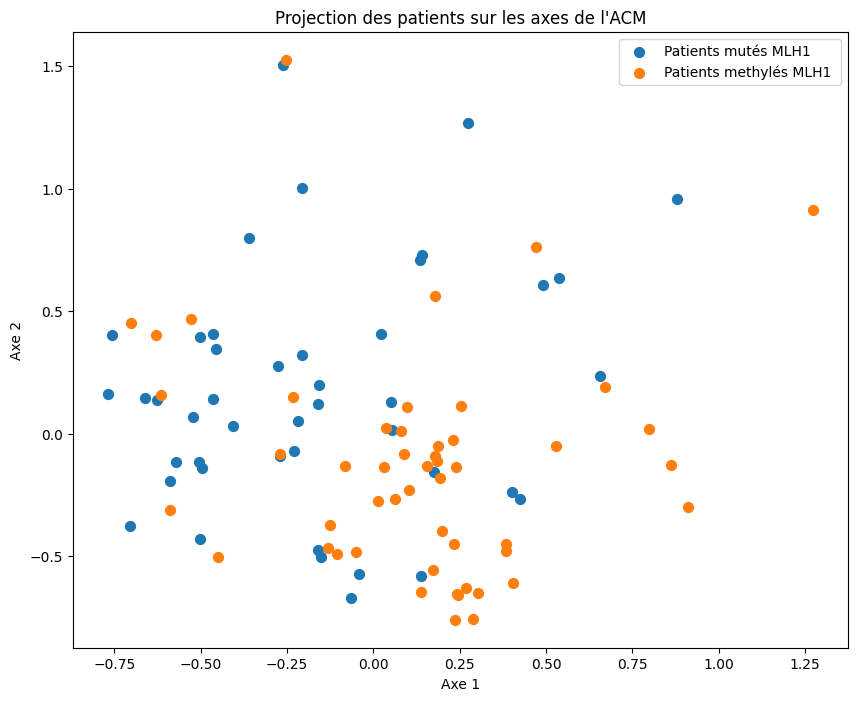

Différence moyenne par axe : 0    0.308331
1    0.065767
2    0.281096
3    0.045755
4    0.173855
5    0.115861
6    0.033764
7    0.069351
8    0.006862
9    0.026298
dtype: float64


,Antécédants familiaux_amsterdam II,Antécédants familiaux_pas d'histoire,IHC MMR_M1/P2,IHC MMR_P2,Unnamed: 9,type_tumeur_simplifie_colon_seul,type_tumeur_simplifie_endo_seul,type_tumeur_simplifie_multiples,age_<45,age_45-50,age_>50
0,0,0,1,0,NaN,0,0,1,1,0,0
1,1,0,1,0,NaN,1,0,0,1,0,0
2,0,0,0,0,NaN,1,0,0,1,0,0
3,1,0,1,0,NaN,1,0,0,0,0,1
4,1,0,1,0,NaN,0,0,1,0,1,0
5,0,0,1,0,NaN,0,1,0,0,1,0
6,0,0,0,1,NaN,0,0,0,1,0,0
7,0,0,1,0,NaN,0,0,1,1,0,0
8,0,0,1,0,NaN,1,0,0,1,0,0
9,1,0,0,0,NaN,1,0,0,0,0,1


In [34]:
# la même mais second graph avec les methylé secondaire /amsterdam ACM a faire en recodant les types de cancers exclusif comme la regression 

# 1️⃣ Import des librairies
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 2️⃣ Charger les données
data = pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil(version2).xlsx')


# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats

# ============================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================================
data = pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\acm_these.xlsx')


# Créer une variable simplifiée avec une seule modalité pour les multiples
data['type_tumeur_simplifie'] = 'autre_tumeur'

# Dès qu'un cancer multiple est détecté → catégorie "multiples"
data.loc[data['cancer multiples'] == 1, 'type_tumeur_simplifie'] = 'multiples'

# Pour les tumeurs uniques, on précise le type
data.loc[(data['cancer multiples'] == 0) & (data['tumeur colorectal'] == 1), 'type_tumeur_simplifie'] = 'colon_seul'
data.loc[(data['cancer multiples'] == 0) & (data['tumeur endometrial'] == 1), 'type_tumeur_simplifie'] = 'endo_seul'


# Supprimer les colonnes inutiles
data = data.drop(columns=['tumeur endometrial', 'tumeur colorectal', 'cancer multiples'])

# Encodage one-hot
data = pd.get_dummies(data, columns=['type_tumeur_simplifie'], drop_first=True)




# 4️⃣ Discrétiser l'âge et créer des dummies
bins = [0, 45, 50, 150]  
labels = ["<45", "45-50", ">50"]
data['age_cat'] = pd.cut(data["Age de la premiere tumeur"], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['age_cat'], prefix='age')
data = data.drop(columns=['Age de la premiere tumeur'])
data_fin=data.drop(columns=['muté/methylé'])



bool_cols = data_fin.select_dtypes('bool').columns
data_fin[bool_cols] = data_fin[bool_cols].astype(int)



# 7️⃣ Créer l'ACM
acm = prince.MCA(
    n_components=10,   # nombre d'axes factoriels
    n_iter=5,
    copy=True,
    random_state=42
)

acm = acm.fit(data_fin)

# 8️⃣ Coordonnées des individus
ind_coords = acm.row_coordinates(data_fin)

# 9️⃣ Couleurs selon la variable muté/methylé
colors = data.loc[data.index, "muté/methylé"]

# 🔟 Visualisation
plt.figure(figsize=(10,8))

# Ajouter un micro-décalage aléatoire
np.random.seed(42)
jitter_x = np.random.normal(0,0.09, size=len(ind_coords))
jitter_y = np.random.normal(0,0.09, size=len(ind_coords))

noms_statuts = {1: 'Patients methylés MLH1 ', 0: 'Patients mutés MLH1 ', 2 : "Patients methylés secondaires/avec critères d'Amsterdam"}  # ← Attention à l'ordre!

for val in colors.unique():
    mask = colors == val
    plt.scatter(ind_coords.loc[mask, 2] + jitter_x[mask], 
                ind_coords.loc[mask, 0] + jitter_y[mask],
                label=noms_statuts[val], alpha=1, s=50)

plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Projection des patients sur les axes de l'ACM")
plt.legend()
plt.show()
data_fin.head(10)



group_means = ind_coords.groupby(colors).mean()
diff_means = np.abs(group_means.iloc[0] - group_means.iloc[1])
print("Différence moyenne par axe :", diff_means)

data_fin.head(10)



Modalités candidates affichées : ['Antécédants familiaux_amsterdam II__1', "Antécédants familiaux_pas d'histoire__1", 'type_tumeur_simplifie_colon_seul__1', 'type_tumeur_simplifie_multiples__1', 'age_<45__1', 'age_45-50__1', 'age_>50__1']


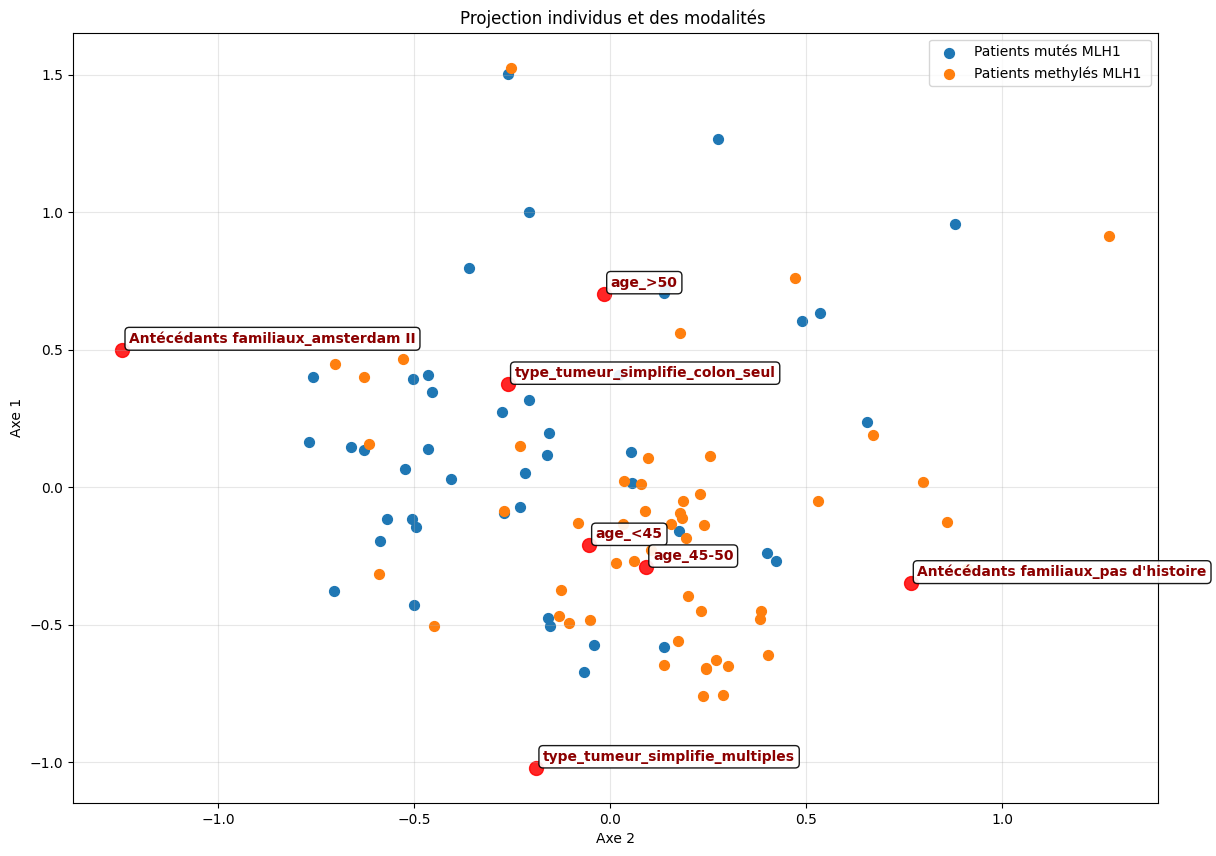

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Coordonnées individus et modalités
# -----------------------------
ind_coords = acm.row_coordinates(data_fin)
mod_coords = acm.column_coordinates(data_fin)

# -----------------------------
# 2. Définir les patterns de modalités à exclure
# -----------------------------
patterns_exclus = ["IHC MMR_M1/P2", "IHC MMR_P2","type_tumeur_simplifie_endo_seul__1"]

# -----------------------------
# 3. Filtrer les modalités "importantes"
# -----------------------------
modalites_1_importantes = [
    m for m in mod_coords.index
    if m.endswith("__1")  # On garde seulement les modalités "oui"
    and not any(p in m for p in patterns_exclus)  # On exclut les modalités indésirables (__0 et __1)
    and np.sqrt(mod_coords.loc[m, 0]**2 + mod_coords.loc[m, 1]**2) > 0.2  # Importance minimale
]

print("\nModalités candidates affichées :", modalites_1_importantes)

# -----------------------------
# 4. Vérifier la présence de l'axe 2
# -----------------------------
has_axis2 = 2 in mod_coords.columns

# -----------------------------
# 5. Ajouter un jitter aux individus
# -----------------------------
np.random.seed(42)  # Seed fixe pour reproductibilité
jitter_x = np.random.normal(0, 0.09, size=ind_coords.shape[0])  # Bruit sur l'axe X
jitter_y = np.random.normal(0, 0.09, size=ind_coords.shape[0])  # Bruit sur l'axe Y


# -----------------------------
# 6. Créer la figure
# -----------------------------
plt.figure(figsize=(14, 10))

# -----------------------------
# 7. Tracer les individus avec jitter
# -----------------------------

# Définir un dictionnaire de correspondance
noms_statuts = {1: 'Patients methylés MLH1 ', 0: 'Patients mutés MLH1 ', 2 : "Patients methylés secondaires/avec critères d'Amsterdam"}  # ← Attention à l'ordre!


for val in colors.unique():
    mask = colors == val
    plt.scatter(ind_coords.loc[mask, 2] + jitter_x[mask], 
                ind_coords.loc[mask, 0] + jitter_y[mask],
                label=noms_statuts[val], alpha=1, s=50)

# -----------------------------
# 8. Ajouter un jitter sur les modalités
# -----------------------------
modal_jitter_x = np.random.normal(0, 0.07, size=len(modalites_1_importantes))
modal_jitter_y = np.random.normal(0, 0.07, size=len(modalites_1_importantes))

# -----------------------------
# 9. Tracer les modalités importantes
# -----------------------------
for idx, m in enumerate(modalites_1_importantes):
    # Coordonnées X (axe 2 si dispo, sinon barycentre des individus)
    if has_axis2:
        x_pos = mod_coords.loc[m, 2]
    else:
        if m in data_fin.columns:
            mask = data_fin[m] == 1
            x_pos = ind_coords.loc[mask, 2].mean() if mask.sum() > 0 else 0
        else:
            x_pos = 0
    
    # Coordonnées Y = axe 0
    y_pos = mod_coords.loc[m, 0]

    # Ajout du jitter
    x_pos += modal_jitter_x[idx]
    y_pos += modal_jitter_y[idx]

    # Scatter + étiquette
    plt.scatter(x_pos, y_pos, s=100, color="red", marker="o", alpha=0.85)
    nom_clean = m.replace("__1", "").replace("_1", "")
    plt.annotate(
        nom_clean,
        (x_pos, y_pos),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        color="darkred",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9)
    )

# -----------------------------
# 10. Mise en forme finale
# -----------------------------
plt.xlabel("Axe 2")
plt.ylabel("Axe 1")
plt.title("Projection individus et des modalités ")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


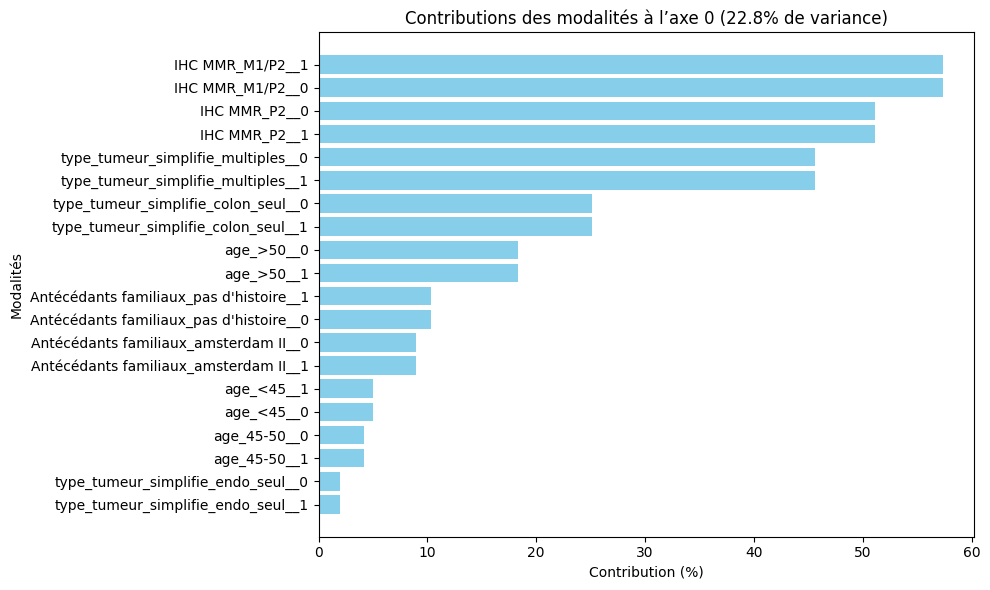

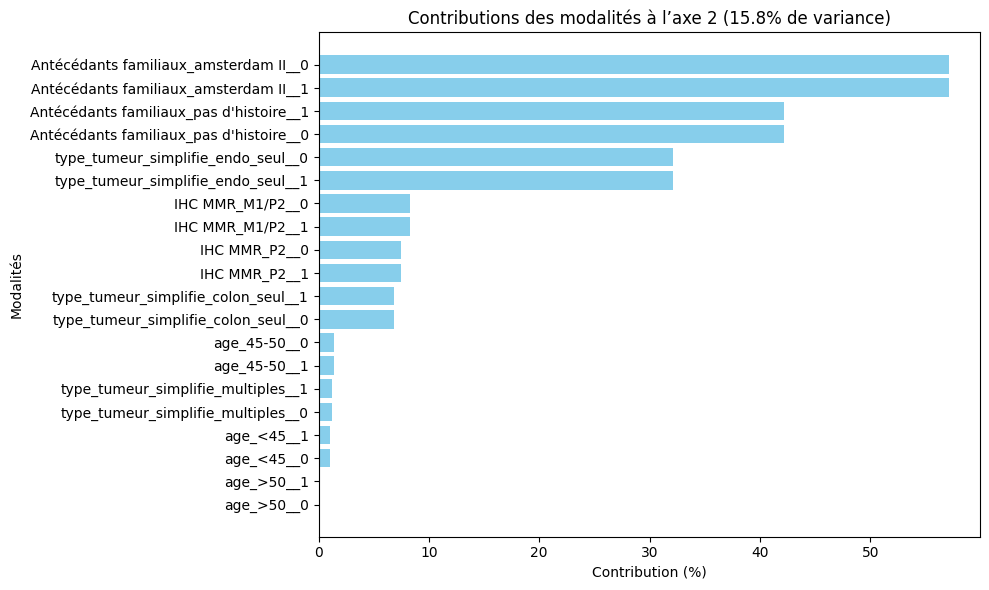

In [11]:
# Récupérer les valeurs propres (inertie de chaque axe)
eigvals = acm.eigenvalues_  # array des valeurs propres
explained = eigvals / eigvals.sum()  # proportion de variance expliquée

# Coordonnées des modalités et cos²
col_coords = acm.column_coordinates(data_fin)
col_cos2 = acm.column_cosine_similarities(data_fin)  # DataFrame : lignes=modalités, colonnes=axes

# Bar plots pour axes 0 et 2
axes_to_plot = [0, 2]

for ax in axes_to_plot:
    contributions = col_cos2.iloc[:, ax] * 100  # ✅ utiliser .iloc pour accéder à la colonne
    contributions = contributions.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(contributions.index, contributions.values, color='skyblue')
    plt.xlabel('Contribution (%)')
    plt.ylabel('Modalités')
    plt.title(f'Contributions des modalités à l’axe {ax} ({explained[ax]*100:.1f}% de variance)')
    plt.gca().invert_yaxis()  # pour avoir la plus grande contribution en haut
    plt.tight_layout()
    plt.show()



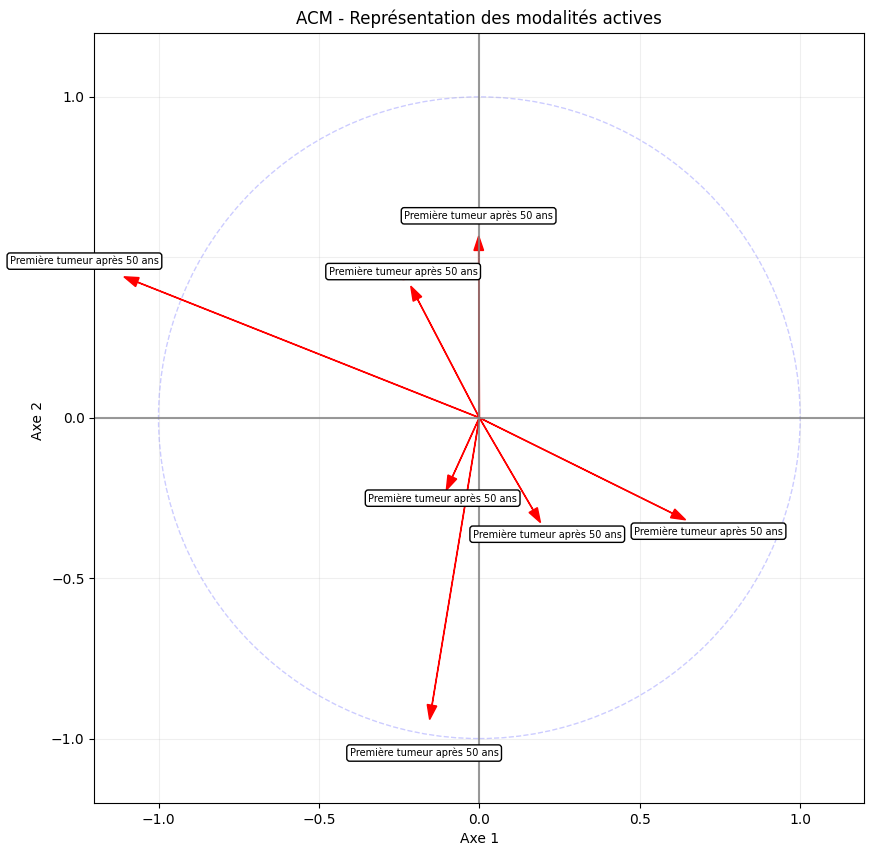

In [24]:
plt.figure(figsize=(12, 10))

# Cercle de référence (mais interprétation différente de l'ACP)
circle = plt.Circle((0, 0), 1, color='blue', fill=False, alpha=0.2, linestyle='--')
plt.gca().add_patch(circle)

# Plot des modalités importantes
for modalite in modalites_1_importantes:
    x, y = mod_coords.loc[modalite, 2], mod_coords.loc[modalite, 0]  # Axe 2 vs Axe 1
    plt.scatter(x, y, color='red', s=100, alpha=1)
    
    # Flèche depuis l'origine
    plt.arrow(0, 0, x*0.9, y*0.9, head_width=0.03, color='red', alpha=1, 
              length_includes_head=True)
    
    # Nom proprement formaté
    nom_clean = renommage_modalites.get(m, m.replace("__1", "").replace("_1", ""))

    plt.text(x, y, nom_clean, fontsize=7, ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=1))

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.8)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.8)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel("Axe 1" )
plt.ylabel("Axe 2 ")
plt.title("ACM - Représentation des modalités actives")
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal')
plt.show()


Modalités candidates affichées : ['Antécédants familiaux_amsterdam II__1', "Antécédants familiaux_pas d'histoire__1", 'type_tumeur_simplifie_colon_seul__1', 'type_tumeur_simplifie_endo_seul__1', 'type_tumeur_simplifie_multiples__1', 'age_<45__1', 'age_45-50__1', 'age_>50__1']


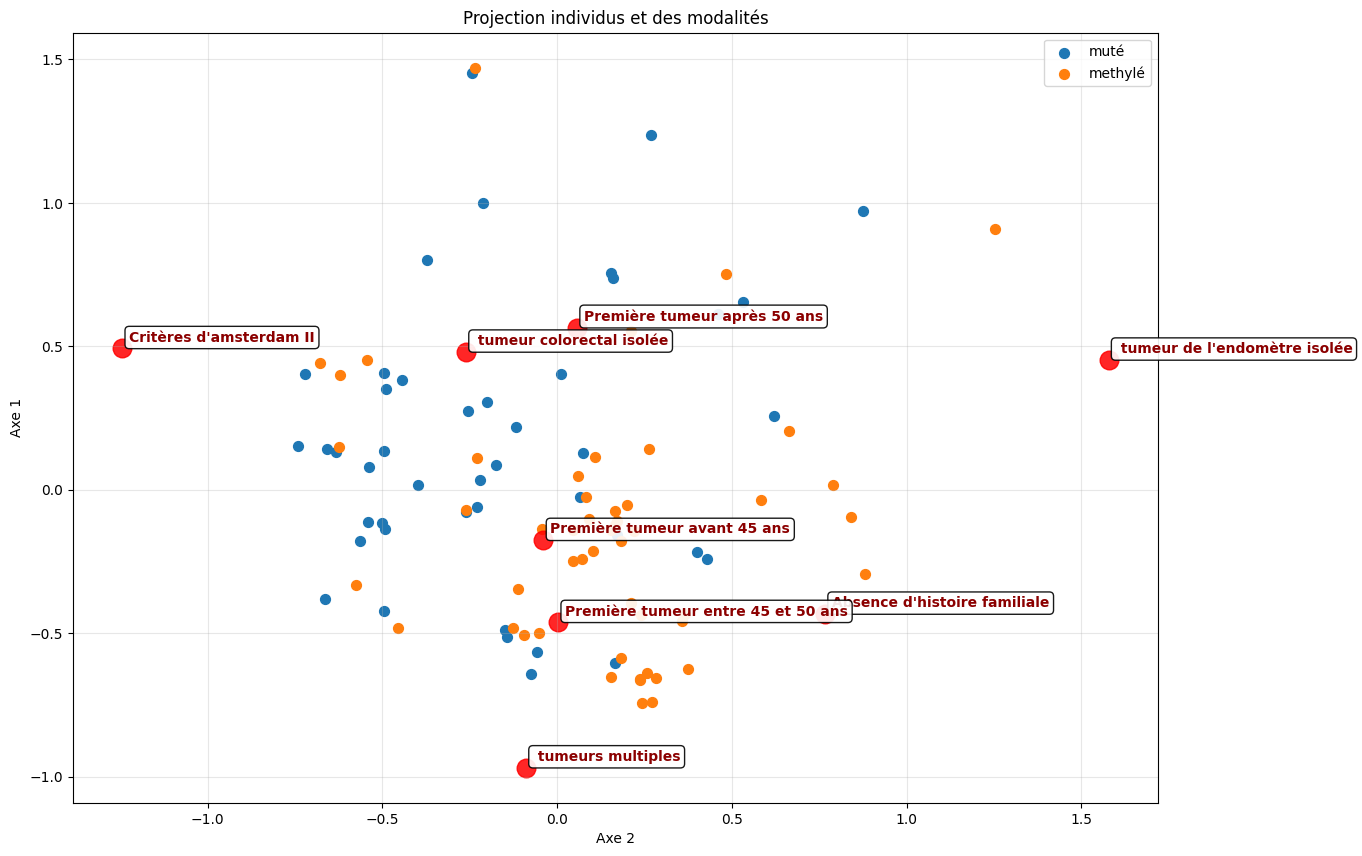

In [47]:
# modalités renommées 

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Coordonnées individus et modalités
# -----------------------------
ind_coords = acm.row_coordinates(data_fin)
mod_coords = acm.column_coordinates(data_fin)

# -----------------------------
# 2. Définir les patterns de modalités à exclure
# -----------------------------
patterns_exclus = ["IHC MMR_M1/P2", "IHC MMR_P2"]

# -----------------------------
# 3. Filtrer les modalités "importantes"
# -----------------------------
modalites_1_importantes = [
    m for m in mod_coords.index
    if m.endswith("__1")  # On garde seulement les modalités "oui"
    and not any(p in m for p in patterns_exclus)  # On exclut les modalités indésirables
    and np.sqrt(mod_coords.loc[m, 0]**2 + mod_coords.loc[m, 1]**2) > 0.2  # Importance minimale
]

print("\nModalités candidates affichées :", modalites_1_importantes)

# -----------------------------
# 4. Vérifier la présence de l'axe 2
# -----------------------------
has_axis2 = 2 in mod_coords.columns

# -----------------------------
# 5. Ajouter un jitter aux individus
# -----------------------------
np.random.seed(42)
jitter_x = np.random.normal(0, 0.07, size=ind_coords.shape[0])
jitter_y = np.random.normal(0, 0.07, size=ind_coords.shape[0])

# -----------------------------
# 6. Créer la figure
# -----------------------------
plt.figure(figsize=(14, 10))

# -----------------------------
# 7. Tracer les individus avec jitter
# -----------------------------
noms_statuts = {
    1: "methylé",
    0: "muté",
    2: "methylé secondaire/avec histoire familiale"
}

for val in colors.unique():
    mask = colors == val
    plt.scatter(ind_coords.loc[mask, 2] + jitter_x[mask],
                ind_coords.loc[mask, 0] + jitter_y[mask],
                label=noms_statuts[val], alpha=1, s=50)

# -----------------------------
# 8. Ajouter un jitter sur les modalités
# -----------------------------
modal_jitter_x = np.random.normal(0, 0.07, size=len(modalites_1_importantes))
modal_jitter_y = np.random.normal(0, 0.07, size=len(modalites_1_importantes))

# -----------------------------
# 9. Dictionnaire pour renommer les modalités affichées
# -----------------------------
renommage_modalites = {
    "age >50": "Perte isolée MLH1",
    'Antécédants familiaux_amsterdam II__1': "Critères d'amsterdam II",
    "Statut_MSI__1": "MSI Haut", 
    "Antécédants familiaux_pas d'histoire__1" :"Absence d'histoire familiale",
    'type_tumeur_simplifie_colon_seul__1':" tumeur colorectal isolée",
    'type_tumeur_simplifie_multiples__1':" tumeurs multiples",
    'age_<45__1':"Première tumeur avant 45 ans",
    'age_45-50__1': "Première tumeur entre 45 et 50 ans",
    'age_>50__1' :"Première tumeur après 50 ans",
    "type_tumeur_simplifie_endo_seul__1" : " tumeur de l'endomètre isolée"
    # ➝ Ajoute ici les noms exacts que tu veux renommer
}


# -----------------------------
# 10. Tracer les modalités importantes
# -----------------------------
for idx, m in enumerate(modalites_1_importantes):
    # Coordonnées X (axe 2 si dispo, sinon barycentre des individus)
    if has_axis2:
        x_pos = mod_coords.loc[m, 2]
    else:
        if m in data_fin.columns:
            mask = data_fin[m] == 1
            x_pos = ind_coords.loc[mask, 2].mean() if mask.sum() > 0 else 0
        else:
            x_pos = 0
    
    # Coordonnées Y = axe 0
    y_pos = mod_coords.loc[m, 0]

    # Ajout du jitter
    x_pos += modal_jitter_x[idx]
    y_pos += modal_jitter_y[idx]

    # ➝ Appliquer le renommage si défini, sinon nettoyer le nom par défaut
    nom_clean = renommage_modalites.get(m, m.replace("__1", "").replace("_1", ""))

    # Scatter + étiquette
    plt.scatter(x_pos, y_pos, s=180, color="red", marker="o", alpha=0.85)
    plt.annotate(
        nom_clean,
        (x_pos, y_pos),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        color="darkred",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9)
    )

# -----------------------------
# 11. Mise en forme finale
# -----------------------------
plt.xlabel("Axe 2")
plt.ylabel("Axe 1")
plt.title("Projection individus et des modalités")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


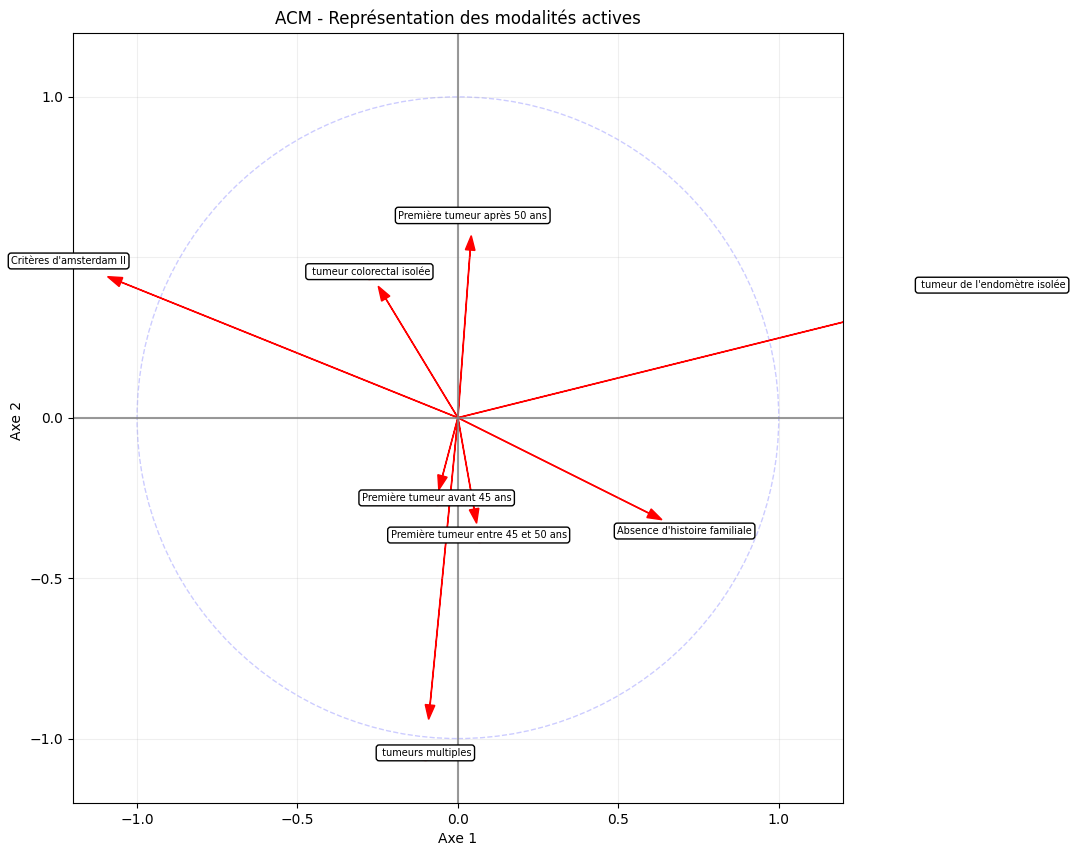

In [50]:
plt.figure(figsize=(12, 10))

# Cercle de référence (mais interprétation différente de l'ACP)
circle = plt.Circle((0, 0), 1, color='blue', fill=False, alpha=0.2, linestyle='--')
plt.gca().add_patch(circle)

# Plot des modalités importantes
for modalite in modalites_1_importantes:
    x, y = mod_coords.loc[modalite, 2], mod_coords.loc[modalite, 0]  # Axe 2 vs Axe 1
    plt.scatter(x, y, color='red', s=100, alpha=1)
    
    # Flèche depuis l'origine
    plt.arrow(0, 0, x*0.9, y*0.9, head_width=0.03, color='red', alpha=1, 
              length_includes_head=True)
    
    # Nom proprement formaté
    nom_clean = renommage_modalites.get(modalite, m.replace("__1", "").replace("_1", ""))

    plt.text(x, y, nom_clean, fontsize=7, ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=1))

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.8)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.8)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel("Axe 1" )
plt.ylabel("Axe 2 ")
plt.title("ACM - Représentation des modalités actives")
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal')
plt.show()

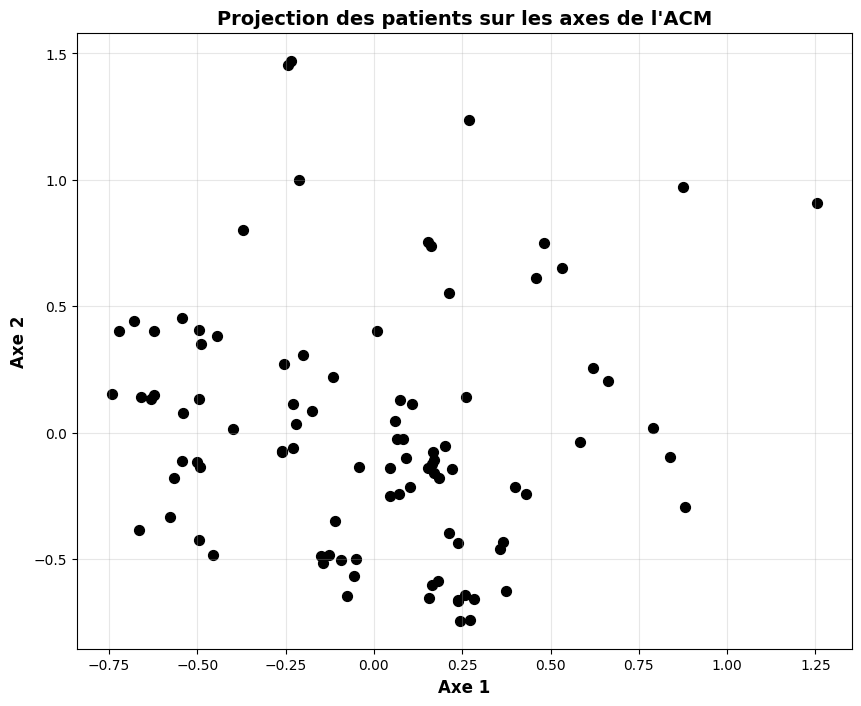

,Antécédants familiaux_amsterdam II,Antécédants familiaux_pas d'histoire,IHC MMR_M1/P2,IHC MMR_P2,Unnamed: 9,type_tumeur_simplifie_colon_seul,type_tumeur_simplifie_endo_seul,type_tumeur_simplifie_multiples,age_<45,age_45-50,age_>50
0,0,0,1,0,NaN,0,0,1,1,0,0
1,1,0,1,0,NaN,1,0,0,1,0,0
2,0,0,0,0,NaN,1,0,0,1,0,0
3,1,0,1,0,NaN,1,0,0,0,0,1
4,1,0,1,0,NaN,0,0,1,0,1,0
5,0,0,1,0,NaN,0,1,0,0,1,0
6,0,0,0,1,NaN,0,0,0,1,0,0
7,0,0,1,0,NaN,0,0,1,1,0,0
8,0,0,1,0,NaN,1,0,0,1,0,0
9,1,0,0,0,NaN,1,0,0,0,0,1


In [8]:
#ACM a faire en recodant les types de cancers exclusif comme la regression 

# 1️⃣ Import des librairies
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 2️⃣ Charger les données
data = pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil(version2).xlsx')

# ============================================================
# 1️⃣ IMPORT DES LIBRAIRIES
# ============================================================
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt

# ============================================================
# 2️⃣ CHARGEMENT DES DONNÉES
# ============================================================
data = pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\acm_these.xlsx')

# ============================================================
# 3️⃣ RECODAGE DES TYPES DE TUMEURS (COMME POUR LA RÉGRESSION)
# ============================================================
# Créer une variable simplifiée avec une seule modalité par individu
data['type_tumeur_simplifie'] = 'autre_tumeur'

# Catégorie "multiples" si plusieurs cancers détectés
data.loc[data['cancer multiples'] == 1, 'type_tumeur_simplifie'] = 'multiples'

# Cas des tumeurs uniques précises
data.loc[(data['cancer multiples'] == 0) & (data['tumeur colorectal'] == 1), 'type_tumeur_simplifie'] = 'colon_seul'
data.loc[(data['cancer multiples'] == 0) & (data['tumeur endometrial'] == 1), 'type_tumeur_simplifie'] = 'endo_seul'

# Supprimer les colonnes inutiles
data = data.drop(columns=['tumeur endometrial', 'tumeur colorectal', 'cancer multiples'])

# Encodage one-hot des types de tumeurs
data = pd.get_dummies(data, columns=['type_tumeur_simplifie'], drop_first=True)
# 4️⃣ Discrétiser l'âge et créer des dummies
bins = [0, 45, 50, 150]  
labels = ["<45", "45-50", ">50"]
data['age_cat'] = pd.cut(data["Age de la premiere tumeur"], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['age_cat'], prefix='age')
data = data.drop(columns=['Age de la premiere tumeur'])
data_fin=data.drop(columns=['muté/methylé'])


# Conversion des booléens en entiers
bool_cols = data_fin.select_dtypes('bool').columns
data_fin[bool_cols] = data_fin[bool_cols].astype(int)

# ============================================================
# 5️⃣ CRÉATION DE L'ACM
# ============================================================
acm = prince.MCA(
    n_components=10,   # nombre d'axes factoriels
    n_iter=5,
    copy=True,
    random_state=42
)

acm = acm.fit(data_fin)

# ============================================================
# 6️⃣ RÉCUPÉRER LES COORDONNÉES DES INDIVIDUS
# ============================================================
ind_coords = acm.row_coordinates(data_fin)

# ============================================================
# 7️⃣ VISUALISATION SANS COLORATION PAR POPULATION
# ============================================================
plt.figure(figsize=(10, 8))

# Ajouter un micro-décalage aléatoire pour éviter le chevauchement des points
np.random.seed(42)
jitter_x = np.random.normal(0, 0.07, size=len(ind_coords))
jitter_y = np.random.normal(0, 0.07, size=len(ind_coords))

# Afficher tous les points en gris
plt.scatter(ind_coords[2] + jitter_x,
            ind_coords[0] + jitter_y,
            color="black", alpha=1, s=50)

# Ajouter un micro-décalage aléatoire
#np.random.seed(42)
#jitter_x = np.random.normal(0, 0.07, size=len(ind_coords))
#jitter_y = np.random.normal(0, 0.07, size=len(ind_coords))
# Définir un dictionnaire de correspondance
#noms_statuts = {1: 'methylé', 0: 'muté'}  # ← Attention à l'ordre!

#for val in colors.unique():
 #   mask = colors == val
 #   plt.scatter(ind_coords.loc[mask, 2] + jitter_x[mask], 
  #              ind_coords.loc[mask, 0] + jitter_y[mask],
  #              label=noms_statuts[val], alpha=1, s=50)
    
    
plt.xlabel("Axe 1", fontsize=12, fontweight="bold")
plt.ylabel("Axe 2", fontsize=12, fontweight="bold")
plt.title("Projection des patients sur les axes de l'ACM", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.show()


# Vérification rapide des données finales utilisées pour l'ACM
data_fin.head(10)


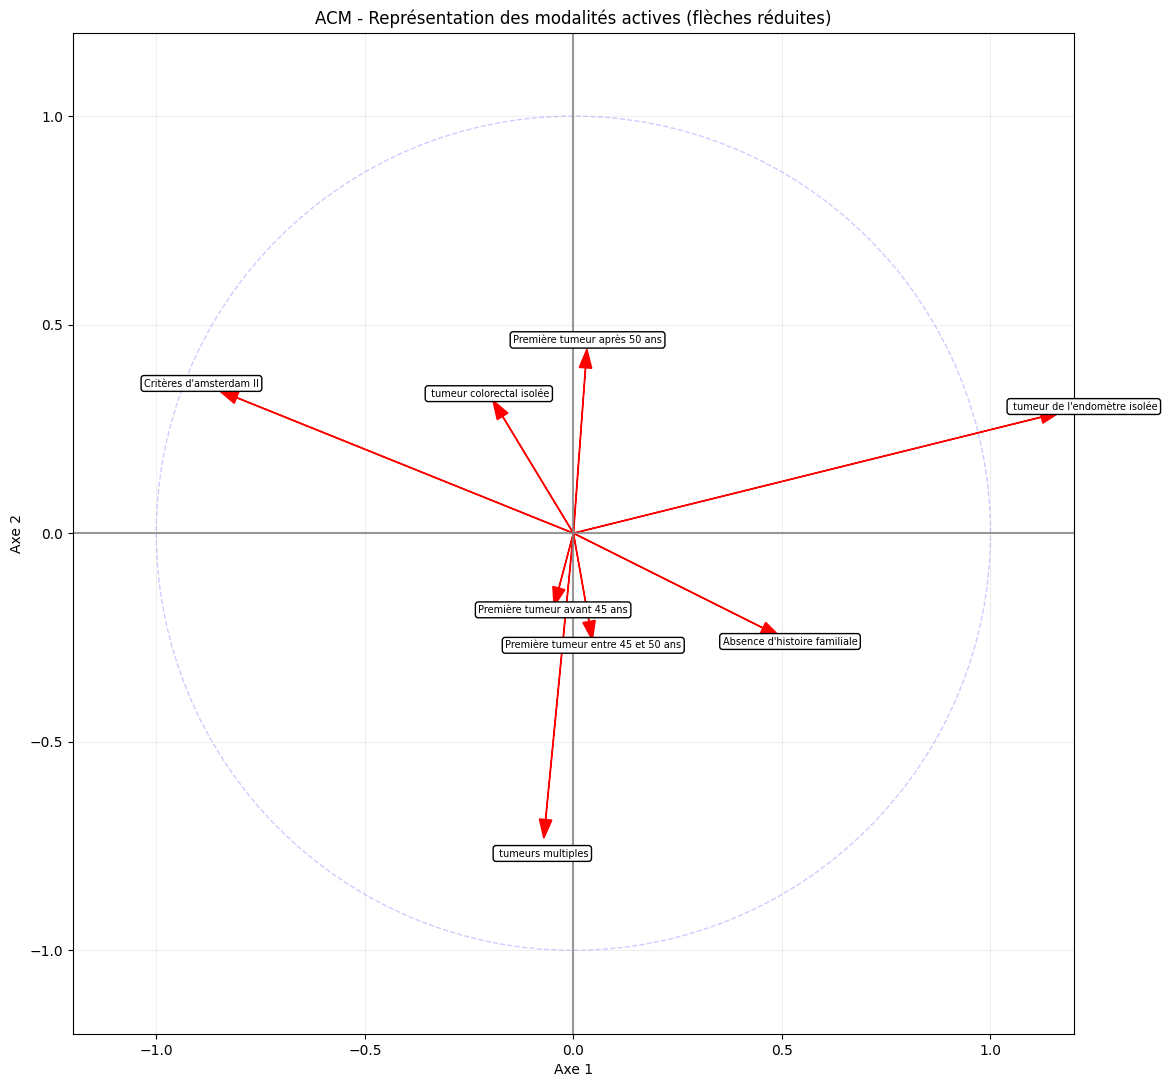

In [ ]:
scale = 0.7  # Réduit la longueur des flèches à 50 %

plt.figure(figsize=(16, 13))
circle = plt.Circle((0, 0), 1, color='blue', fill=False, alpha=0.2, linestyle='--')
plt.gca().add_patch(circle)

for modalite in modalites_1_importantes:
    x, y = mod_coords.loc[modalite, 2], mod_coords.loc[modalite, 0]
    
    
    # Flèches réduites
    plt.arrow(0, 0, x * scale, y * scale, head_width=0.03, color='red', alpha=1, 
              length_includes_head=True)
    
    # Labels au bon endroit
    nom_clean = renommage_modalites.get(modalite, modalite)
    plt.text(x * scale * 1.05, y * scale * 1.05, nom_clean, fontsize=7,
             ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", 
             facecolor="white", alpha=1))

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.8)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.8)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("ACM - Représentation des modalités actives ")
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal')
plt.show()
